In [1]:
import networkx as nx
import numpy as np
import os

In [2]:
file_email="email-Eu-core.txt"
file_dep="email-Eu-core-department-labels.txt"

# Creazione del grafo

In [3]:
G = nx.DiGraph();
id_length = 7

#Reading the graph from the edge list
#leggo il file email e creo la rete corrispondente
with open(file_email) as file:
    for line in file.readlines():
        nodes = tuple(int(x) for x in line.split(" "))
        n1, n2 = nodes
        G.add_node(n1)
        G.add_node(n2)
        G.add_edge(n1,n2)
        
n_edges=len(G.edges())
n_nodes=len(G.nodes())

print("# Nodes: {}".format(n_nodes))
print("# Edges: {}".format(n_edges))
nx.write_graphml(G, "graphs/network.graphml")

# Nodes: 1005
# Edges: 25571


In [4]:
#leggo i dipartimenti del file e creo un dizionario associazione nodo-dipartimento
departments = dict()
with open(file_dep) as file:
    for line in file:
        row = tuple(int(x) for x in line.split(" "))
        node,dep = row
        departments[node] = dep
        
#aggiungo l'attributo del dipartimento alla rete
nx.set_node_attributes(G, departments, "department")

 # Graph Meausures

In [5]:
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

In [6]:
# density measures the fraction of existing edges out of the possible edges
# directed networks: m/n(n-1)
# undirectd networks: 2m/n(n-1)
# this is much faster than calculating: nx.number_of_edges(G)/nx.non_edges(G)

density=nx.density(G)
print("Density: {:.5f}".format(density))

Density: 0.02534


In [7]:
# Create the undirected version of the graph
GUnd = nx.Graph(G)

In [8]:
num_triangles = sum(nx.triangles(GUnd).values())/3
print("# of triangles: ",num_triangles)

# of triangles:  105461.0


In [9]:
# Function nx.clustering(G, nodes=None) calculates the clustering coefficient of the nodes passed.
# That can be interpreted as a measure of the prevalence of triangles in an egocentric network. 
# The clustering coefficient is the fraction of possible triangles that contain the ego node and exist. 
# This measure is undefined for directed graphs; you must coerce a digraph to a undirected graph 
clustering_coeff = nx.clustering(GUnd)


In [10]:
# Function nx.average_clustering calculates the mean clustering coefficient for all nodes of a simple network 
# (no loops, no directed or parallel edges).
avg_clustering = nx.average_clustering(GUnd)
print("Average Clustering: {}".format(avg_clustering))

Average Clustering: 0.3993549664221539


In [11]:
# The average clustering coefficient is not to be confused with the clustering coefficient of the 
# whole network—the fraction of all possible triangles that exist in the network. 
# The latter is known as transitivity, a measure of transitive closure (explained here). 
# networkx has a namesake function to calculate it, too:

trans = nx.transitivity(G)
print("Transitivity: {:.5f}".format(trans))

Transitivity: 0.22015


In [12]:
dict_deg = {node: val for (node, val) in G.degree()}
dict_indeg  = {node: val for (node, val) in G.in_degree()}
dict_outdeg = {node: val for (node, val) in G.out_degree()}
dict_clco = nx.clustering(GUnd)

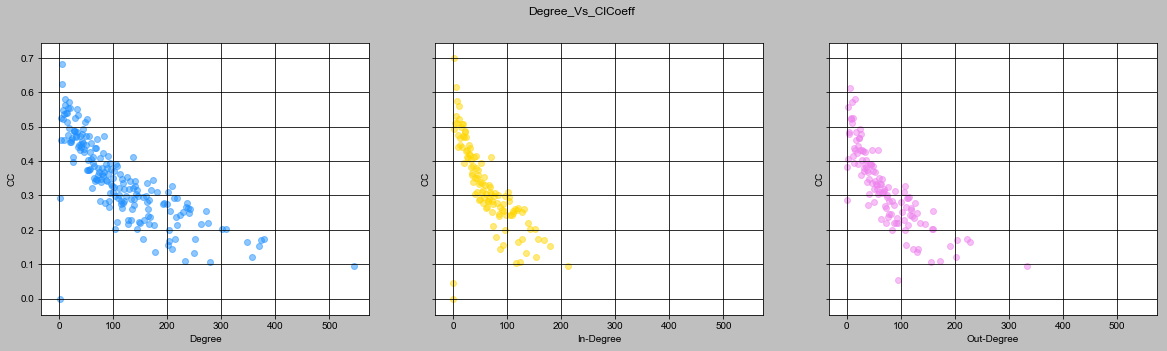

In [74]:
# Plotting the degree correlated to the clustering coefficient
deg_cc = pd.concat([pd.Series(dict_deg), pd.Series(dict_indeg), pd.Series(dict_outdeg), pd.Series(dict_clco)], axis=1)
deg_cc.columns = ("Degree", "In-Degree", "Out-Degree","CC")

labels = [["Degree", "CC"], ["In-Degree", "CC"], ["Out-Degree", "CC"]]

data_deg = deg_cc[labels[0]].groupby(labels[0][0]).mean().reset_index()
data_in  = deg_cc[labels[1]].groupby(labels[1][0]).mean().reset_index()
data_out = deg_cc[labels[2]].groupby(labels[2][0]).mean().reset_index()
data = [data_deg, data_in, data_out]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)
f.set_figwidth(20)
f.set_figheight(5)
title = "Degree_Vs_ClCoeff"
colors = ['dodgerblue','gold','violet']

for names, df, ax, c in zip(labels, data, [ax1, ax2, ax3], colors):
    values = df.values.astype(np.float)
    ax.scatter(values[:,0], values[:,1],c=c, alpha=0.5)
    ax.set_xlabel(names[0])
    ax.set_ylabel(names[1])
    ax.grid()
f.suptitle(title)
plt.savefig("images/{}.png".format(title), dpi=600)
plt.show()

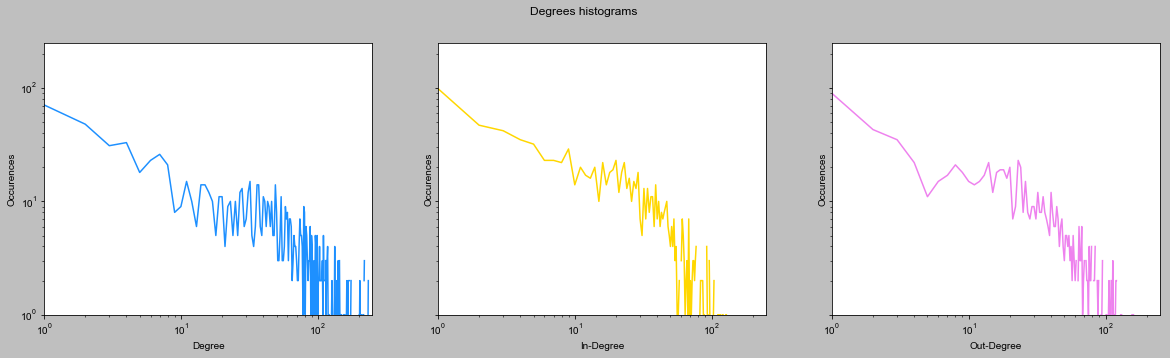

In [78]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
f.set_figwidth(20)
f.set_figheight(5)
title = "Degrees histograms"

data = [dict_deg, dict_indeg, dict_outdeg]
for names, degrees, ax, c in zip(labels, data, [ax1, ax2, ax3], colors):
    d = list(degrees.values())
    bins = np.bincount(d)
    #ax.plot(np.arange(0,len(bins)), bins, c)
    ax.set_xlim([1,250])
    ax.set_ylim([1,250])
    #ax.hist(degrees.values(), bins=100)
    #ax.set_yscale("log")
    ax.loglog(np.arange(0,len(bins)), bins, c=c)
    ax.set_xlabel(names[0])
    ax.set_ylabel("Occurences")
f.suptitle(title)
plt.savefig("images/{}.png".format(title), dpi=600)
plt.show()

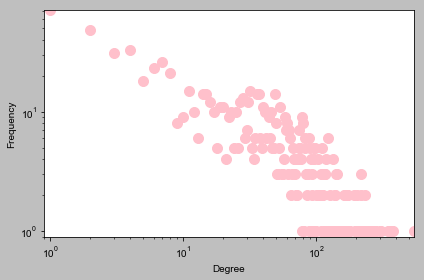

In [15]:
import dzcnapy_plotlib as dzcnapy
from collections import Counter

deg = nx.degree(G)
x, y = zip(*Counter([d for n, d in deg]).items())

plt.scatter(x, y, s=100, c="pink")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlim(0.9, max(x))
plt.ylim(0.9, max(y))
plt.xlabel("Degree")
plt.ylabel("Frequency")
dzcnapy.plot("panama-beneficiaries")

In [16]:
deg_cc = pd.concat([pd.Series(dict_deg), pd.Series(dict_indeg), pd.Series(dict_outdeg), pd.Series(dict_clco)], axis=1)
deg_cc.columns = ("Degree", "In-Degree", "Out-Degree","CC")

labels = [["Degree", "CC"], ["In-Degree", "CC"], ["Out-Degree", "CC"]]

data_deg = deg_cc[labels[0]].groupby(labels[0][0]).mean().reset_index()
data_in  = deg_cc[labels[1]].groupby(labels[1][0]).mean().reset_index()
data_out = deg_cc[labels[2]].groupby(labels[2][0]).mean().reset_index()
data = [data_deg, data_in, data_out]

means = deg_cc.mean(axis=0)
std_devs = deg_cc.std(axis=0)
print("MEAN VALUES")
print(means)
print("\nSTANDARD DEVIATIONS")
print(std_devs)

MEAN VALUES
Degree        50.887562
In-Degree     25.443781
Out-Degree    25.443781
CC             0.399355
dtype: float64

STANDARD DEVIATIONS
Degree        60.157349
In-Degree     27.970817
Out-Degree    33.323927
CC             0.251691
dtype: float64


# Comparison with random models

In [17]:
# Generate and draw random networks
m = int(np.round(means["Degree"]))
G_BA = nx.barabasi_albert_graph(len(G), m)
G_HK = nx.powerlaw_cluster_graph(len(G), m, 0.5)
print("BA ", len(G_BA), len(G_BA.edges()))
print("HK ", len(G_HK), len(G_HK.edges()))

BA  1005 48654
HK  1005 47739


In [18]:
dict_clco2 = nx.clustering(G_BA)
dict_deg2 = {node: val for (node, val) in G_BA.degree()}
dict_clco3 = nx.clustering(G_HK)
dict_deg3 = {node: val for (node, val) in G_HK.degree()}

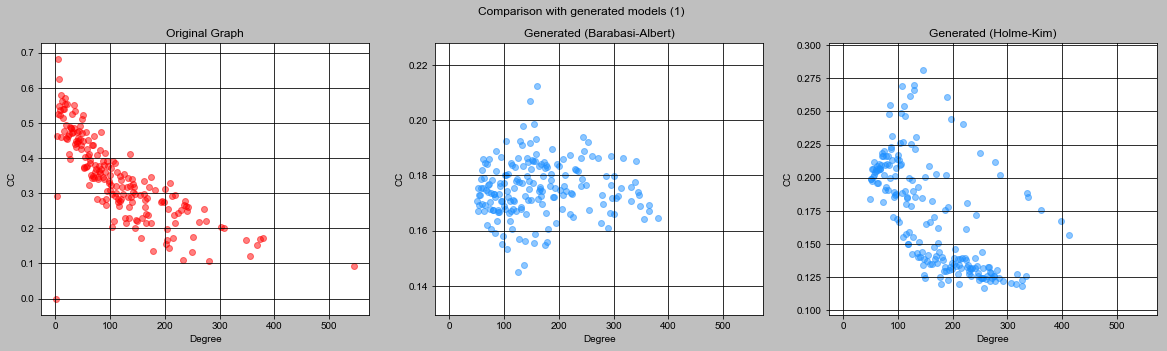

In [20]:
# Plotting the degree correlated to the clustering coefficient
deg_cc2 = pd.concat([pd.Series(dict_deg2), pd.Series(dict_clco2)], axis=1)
deg_cc2.columns = ("Degree","CC")

deg_cc3 = pd.concat([pd.Series(dict_deg3), pd.Series(dict_clco3)], axis=1)
deg_cc3.columns = ("Degree","CC")

labels = ["Degree", "CC"]
titles = ["Original Graph", "Generated (Barabasi-Albert)", "Generated (Holme-Kim)"]
data_deg2 = deg_cc2[labels].groupby(labels[0]).mean().reset_index()
data_deg3 = deg_cc3[labels].groupby(labels[0]).mean().reset_index()
data = [data_deg, data_deg2, data_deg3]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True)
f.set_figwidth(20)
f.set_figheight(5)
title = "Comparison with generated models (1)"
colors = ['red','dodgerblue','dodgerblue']

for t, df, ax, c in zip(titles, data, [ax1, ax2, ax3], colors):
    values = df.values.astype(np.float)
    ax.scatter(values[:,0], values[:,1],c=c, alpha=0.5)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_title(t)
    ax.grid()
f.suptitle(title)
plt.savefig("images/{}.png".format(title), dpi=600)
plt.show()

[ 0 71 48 31 33 18 23 26 21  8  9 15 10  6 14 14 12 10  5 11 11  4  9 10  5
 10  5 12 13  6  7 12 15  5  4  6 14 14  6  5 11 10  6 10  9  6 10  5  5 14
  8  3  3  5 11  3  3  4  9  7  8  3  7  7  6  2  3  5  4  4  3  2  2  4  7
  5  5  4  1  9  8  1  6  5  3  2  3  3  6  1  5  4  1  2  3  1  5  4  1  5
  1  2  2  4  2  0  2  2  3  1  5  2  2  0  3  1  3  3  4  1  1  1  0  0  6
  0  1  2  1  0  1  0  1  4  1  1  1  1  2  1  2  3  1  0  3  1  1  0  1  1
  0  0  0  0  0  1  1  0  1  0  0  1  1  2  1  1  2  1  0  2  2  0  0  0  1
  2  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  2  0  1  0  0  0  1
  0  1  1  2  1  1  0  0  1  1  0  0  0  1  0  1  1  0  2  3  0  0  0  1  0
  0  0  0  0  0  1  0  0  1  2  0  1  0  1  0  1  0  1  0  0  0  0  0  0  1
  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0

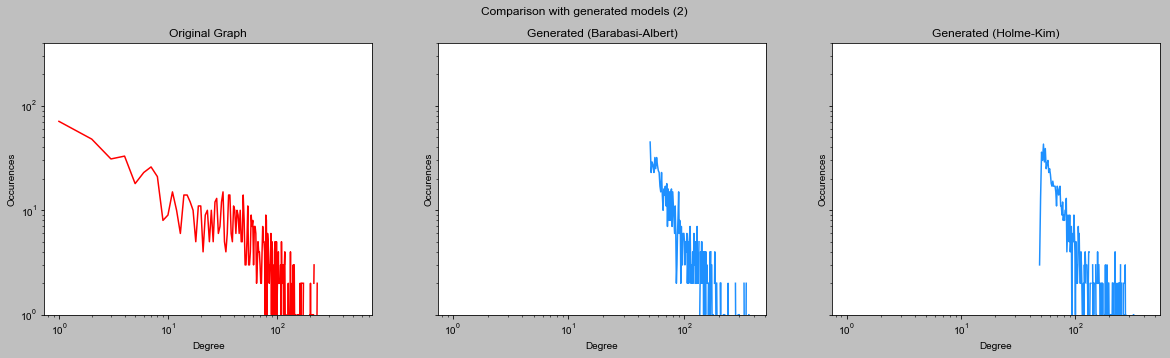

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figwidth(20)
f.set_figheight(5)
title = "Comparison with generated models (2)"

d1 = [val for (n, val) in  G.degree()]
d2 = [val for (n, val) in G_BA.degree()]
d3 = [val for (n, val) in G_HK.degree()]

data = [d1, d2, d3]
for t, d, ax, c in zip(titles, data, [ax1, ax2, ax3], colors):
    bins = np.bincount(d)
    print(bins)
    ax.loglog(np.arange(0,len(bins)), bins, c=c)
    #ax.hist(degrees.values(), bins=1000)
    ax.set_ylim([1,400])
    ax.set_xlabel("Degree")
    ax.set_ylabel("Occurences")
    ax.set_title(t)
f.suptitle(title)
plt.savefig("images/{}.png".format(title), dpi=600)
plt.show()

In [22]:
# selecting node with max degree
best_node = max(dict_deg.keys(), key=(lambda key: dict_deg[key]))
print("Node: ", best_node)
print(G.nodes[best_node])
print("degree: ", dict_deg[best_node])

Node:  160
{'department': 36}
degree:  546


In [23]:
# selecting node with max in degree
best_node = max(dict_deg.keys(), key=(lambda key: dict_deg[key]))
print("Node: ", best_node)
print(G.nodes[best_node])
print("degree: ", dict_deg[best_node])

Node:  160
{'department': 36}
degree:  546


In [24]:
# selecting node with max in-degree
best_node_in = max(dict_indeg.keys(), key=(lambda key: dict_indeg[key]))
print("Node: ", best_node_in)
print(G.nodes[best_node_in])
print("in-degree : ", dict_indeg[best_node_in])

Node:  160
{'department': 36}
in-degree :  212


In [25]:
# selecting node with max out-degree
best_node_out = max(dict_outdeg.keys(), key=(lambda key: dict_outdeg[key]))
print("Node: ", best_node_out)
print(G.nodes[best_node_out])
print("out-degree: ", dict_outdeg[best_node_out])

Node:  160
{'department': 36}
out-degree:  334


# Communities

In [116]:
#Dividing into components and finding the biggest one
weak_components = list(nx.weakly_connected_components(G))
weak_components_count = len(weak_components)
weak_gcc = nx.Graph(max(nx.weakly_connected_component_subgraphs(G), key=len))
weak_percent = len(weak_gcc.nodes()) / (len(G.nodes()))
print("Weak Components: {}, Giant size: {} ({:.3f}%)".format(weak_components_count, len(weak_gcc.nodes()), weak_percent))

Weak Components: 20, Giant size: 986 (0.981%)


In [117]:
#Dividing into components and finding the biggest one
strong_components = list(nx.strongly_connected_components(G))
strong_components_count = len(strong_components)
strong_gcc = nx.Graph(max(nx.strongly_connected_component_subgraphs(G), key=len))
strong_percent = len(strong_gcc.nodes()) / (len(G.nodes()))
print("Strong Components: {}, Giant size: {} ({:.3f}%)".format(strong_components_count, len(strong_gcc.nodes()), strong_percent))

Strong Components: 203, Giant size: 803 (0.799%)


In [118]:
wgc_eccvals = nx.eccentricity(weak_gcc)
sgc_eccvals = nx.eccentricity(strong_gcc)

In [119]:
weak_diameter = nx.diameter(weak_gcc, wgc_eccvals)
weak_radius = nx.radius(weak_gcc, wgc_eccvals)
strong_diameter = nx.diameter(strong_gcc, sgc_eccvals)
strong_radius = nx.radius(strong_gcc, sgc_eccvals)
print("Weak \t- diameter: {}, radius: {}".format(weak_diameter, weak_radius))
print("Strong\t- diameter: {}, radius: {}".format(strong_diameter, strong_radius))

Weak 	- diameter: 7, radius: 4
Strong	- diameter: 5, radius: 3


In [120]:
print("WEAK CC CENTER")
centro_w = nx.center(weak_gcc, e=wgc_eccvals)
print(centro_w)
print("Dim centro {}".format(len(centro_w)))

WEAK CC CENTER
[0, 1, 5, 6, 12, 13, 14, 16, 17, 18, 21, 25, 26, 27, 29, 33, 35, 37, 38, 39, 40, 41, 47, 48, 51, 52, 53, 60, 61, 62, 64, 65, 70, 74, 76, 79, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 103, 104, 105, 106, 107, 113, 114, 115, 116, 120, 121, 122, 123, 127, 128, 129, 130, 133, 135, 139, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 155, 156, 157, 160, 162, 163, 165, 166, 167, 168, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 189, 191, 196, 199, 201, 203, 204, 205, 206, 207, 211, 212, 214, 215, 218, 220, 221, 222, 223, 225, 226, 227, 228, 231, 232, 245, 249, 250, 251, 254, 255, 256, 257, 258, 261, 262, 263, 270, 275, 277, 278, 280, 282, 283, 284, 289, 290, 291, 292, 295, 296, 301, 305, 307, 308, 309, 310, 312, 314, 316, 317, 318, 320, 321, 333, 339, 340, 342, 343, 345, 346, 347, 349, 350, 351, 352, 361, 362, 365, 366, 368, 370, 373, 376, 377, 378, 379, 380, 381, 384, 385, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 402, 403, 409, 413, 417, 419, 

In [121]:
print("STRONG CC CENTER")
centro_s = nx.center(strong_gcc, e=sgc_eccvals)
print(centro_s)
print("Dim centro {}".format(len(centro_s)))

STRONG CC CENTER
[0, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 16, 17, 19, 21, 23, 24, 28, 35, 36, 41, 42, 44, 46, 47, 51, 53, 58, 62, 63, 64, 65, 69, 74, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 92, 93, 96, 99, 100, 103, 105, 106, 107, 113, 114, 115, 116, 121, 123, 128, 129, 131, 132, 133, 134, 135, 137, 139, 141, 142, 143, 145, 152, 153, 154, 155, 157, 158, 160, 162, 163, 165, 166, 168, 169, 170, 171, 172, 173, 174, 177, 180, 183, 184, 187, 189, 191, 196, 198, 199, 201, 206, 207, 208, 209, 210, 211, 212, 215, 218, 221, 222, 223, 226, 229, 232, 233, 236, 238, 243, 245, 249, 252, 253, 255, 256, 261, 263, 268, 269, 272, 278, 280, 282, 283, 284, 285, 286, 288, 290, 291, 292, 296, 300, 301, 303, 306, 308, 309, 312, 314, 318, 320, 325, 327, 329, 333, 338, 340, 346, 349, 351, 353, 356, 357, 362, 365, 366, 367, 371, 373, 376, 377, 379, 389, 393, 395, 397, 400, 404, 405, 408, 409, 411, 417, 419, 420, 421, 422, 423, 424, 425, 426, 427, 430, 434, 438, 440, 441, 445, 450, 458, 460, 464, 466, 473, 474

In [122]:
#exporting the giant component for analysis
giant = max(nx.strongly_connected_component_subgraphs(G), key=len)
nx.write_graphml(giant, "graphs/network-strong-gcc.graphml")

In [84]:
# Centralities

In [88]:
dgr = nx.degree_centrality(G)
clo = nx.closeness_centrality(G)
eig = nx.eigenvector_centrality(G)
bet = nx.betweenness_centrality(G)
pgr = nx.pagerank(G)

In [90]:
hubs,auths = nx.hits(G)

In [153]:
GLab = G.copy()
nx.set_node_attributes(GLab, dgr, "degree_cent")
nx.set_node_attributes(GLab, clo, "closeness")
nx.set_node_attributes(GLab, eig, "eigen")
nx.set_node_attributes(GLab, bet, "betweenness")
nx.set_node_attributes(GLab, pgr, "pr")
nx.set_node_attributes(GLab, hubs, "hub")
nx.set_node_attributes(GLab, auths, "auth")
nx.write_graphml(GLab, "graphs/network-auth-gcc.graphml")

# Communities

In [ ]:
import community

In [125]:
partitions = community.best_partition(GUnd)

In [126]:
community.modularity(partitions,GUnd)

0.421183064116178

In [127]:
part_series = pd.Series(partitions)
part_series.sort_values()
part_series = part_series.value_counts()
part_series.head()

0    297
3    232
1    149
5    136
2     96
dtype: int64

In [103]:
induced = community.induced_graph(partitions, G)
print("Communities: ", len(induced.nodes()))


Communities:  27


In [128]:
community_sizes = {n: int(part_series[n]) for n in induced.nodes()}
nx.set_node_attributes(induced, community_sizes, "size")

In [129]:
print(induced.nodes(data=True))
nx.write_graphml(induced, "graphs/network-communities-mod.graphml")

[(0, {'size': 297}), (1, {'size': 149}), (2, {'size': 96}), (3, {'size': 232}), (4, {'size': 59}), (5, {'size': 136}), (6, {'size': 16}), (7, {'size': 1}), (8, {'size': 1}), (9, {'size': 1}), (10, {'size': 1}), (11, {'size': 1}), (12, {'size': 1}), (13, {'size': 1}), (14, {'size': 1}), (15, {'size': 1}), (16, {'size': 1}), (17, {'size': 1}), (18, {'size': 1}), (19, {'size': 1}), (20, {'size': 1}), (21, {'size': 1}), (22, {'size': 1}), (23, {'size': 1}), (24, {'size': 1}), (25, {'size': 1}), (26, {'size': 1})]


In [130]:
#cliques
cliques = list(nx.find_cliques(GUnd))
cliques = sorted(cliques, key=lambda clique: -len(clique))
print("Number of cliques: ", len(cliques))
print("Max clique: ", len(cliques[0]))

Number of cliques:  42728
Max clique:  18


clique_sizes = [len(c) for c in cliques]
plt.plot(np.arange(0, len(clique_sizes)), clique_sizes)
plt.savefig("images/{}.png".format("Cliques"), dpi=600)
plt.show()


In [132]:
G_clique = nx.subgraph(G, cliques[0])
print(len(G_clique), len(G_clique.edges()))
nx.write_graphml(G_clique, "graphs/network-clique.graphml")

18 316


In [133]:
#Manual communities by department
dep_comms = dict()
for n, att in G.nodes(data=True):
    y = att["department"]
    if y not in dep_comms:
        dep_comms[y] = []
    dep_comms[y].append(n)

In [134]:
dep_partition = []
for vals in dep_comms.values():
    dep_partition.append(set(vals))

In [152]:
def data_f(B):
    result = dict()
    result["nnodes"] = len(B)
    result["department"] = G.nodes(data=True)[next(iter(B))]["department"]
    return result

G_deps = nx.quotient_graph(G, dep_partition, relabel=True, node_data=data_f)
p=community.best_partition(nx.Graph(G_deps))

In [136]:
print(len(G_deps), len(G_deps.edges()))
nx.write_graphml(G_deps, "graphs/network-comm-depss.graphml")

42 1203


In [137]:
# The following code fragment calculates the dictionary and separates the keys and values into 
# two lists my_degree and their_degree:

my_degree, their_degree = zip(*nx.average_degree_connectivity(G).items())

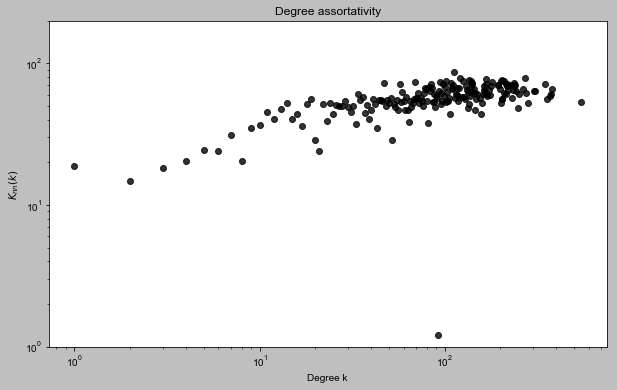

In [138]:
k_knn = pd.concat([pd.Series(v) for v in (my_degree, their_degree)], axis=1)
k_knn.columns = ("k", "Knn(k)")
k_knn = k_knn.groupby("k").mean().reset_index()
plt.figure(figsize=(10,6))
plt.scatter(k_knn["k"], k_knn["Knn(k)"], alpha=0.8)
plt.xscale("log")
plt.yscale("log")
plt.ylim([1, 200])
plt.ylabel("$K_{nn}(k)$")
plt.xlabel("Degree k")
plt.title("Degree assortativity")
plt.savefig("images/{}.png".format("Degree assortativity"), dpi=600)
plt.show()

In [140]:
nx.attribute_assortativity_coefficient(G,'department')

0.3313941805773325

In [141]:
#homophily
nx.attribute_mixing_matrix(G, "department")

array([[  1.78327011e-02,   1.36873802e-03,   3.91068007e-05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.43029213e-04,   2.10785656e-02,   3.51961206e-04, ...,
          9.38563216e-04,   7.82136013e-05,   1.56427203e-04],
       [  7.82136013e-05,   3.12854405e-04,   1.95534003e-03, ...,
          3.91068007e-05,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   1.17320402e-03,   1.17320402e-04, ...,
          7.82136013e-05,   0.00000000e+00,   0.00000000e+00],
       [  1.17320402e-04,   1.95534003e-04,   3.91068007e-05, ...,
          0.00000000e+00,   5.08388409e-04,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   3.91068007e-05]])